# Drawing with 2D Vectors - Exercises

## Drawing with 2D Vectors

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *
from math import sqrt

In [2]:
pts = [(x,x**2) for x in range(-10,11)]
pts

[(-10, 100),
 (-9, 81),
 (-8, 64),
 (-7, 49),
 (-6, 36),
 (-5, 25),
 (-4, 16),
 (-3, 9),
 (-2, 4),
 (-1, 1),
 (0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100)]

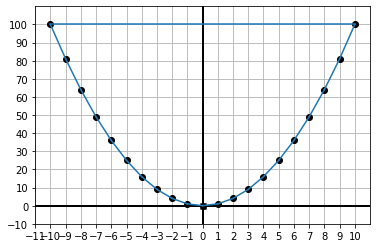

In [3]:
draw(Points(*pts), Polygon(*pts), grid=(1,10), nice_aspect_ratio=False)

## Plane Vector Arithmetic

In [4]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

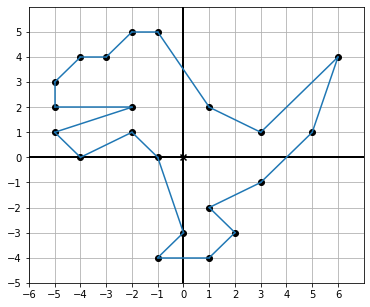

In [5]:
draw(Points(*dino_vectors), Polygon(*dino_vectors))

In [6]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [7]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

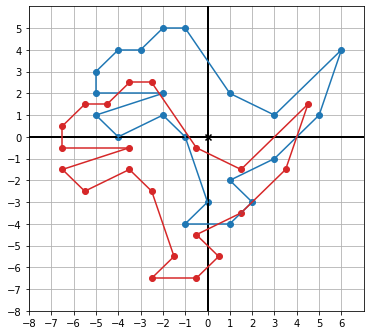

In [8]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
    )

In [9]:
def test(*args):
    return sum(args)

test(2,3,4,5,6)

20

In [10]:
l = [2,3,4,5,6]
test(*l)

20

In [11]:
def add(*vectors):
    return (sum(v[0] for v in vectors), sum(v[1] for v in vectors)) 

In [97]:
def translate(vector, vectors):
    return [add(vector, v) for v in vectors]

In [13]:
t = (2,2)
dino_vectors3 = translate(t, dino_vectors)
dino_vectors3

[(8, 6),
 (5, 3),
 (3, 4),
 (1, 7),
 (0, 7),
 (-1, 6),
 (-2, 6),
 (-3, 5),
 (-3, 4),
 (0, 4),
 (-3, 3),
 (-2, 2),
 (0, 3),
 (1, 2),
 (2, -1),
 (1, -2),
 (3, -2),
 (4, -1),
 (3, 0),
 (5, 1),
 (7, 3)]

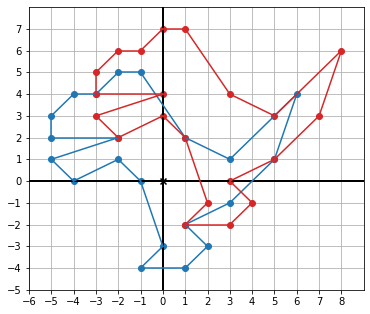

In [14]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors3, color=red),
    Polygon(*dino_vectors3, color=red),
)

In [15]:
def hundred_dinos():
    translation = [(12*x, 12*y) for x in range(0,9) for y in range(0,9)]
    dinos = [Polygon(*translate(t, dino_vectors)) for t in translation]
    draw(*dinos, grid=None, axes=None, origin=None)

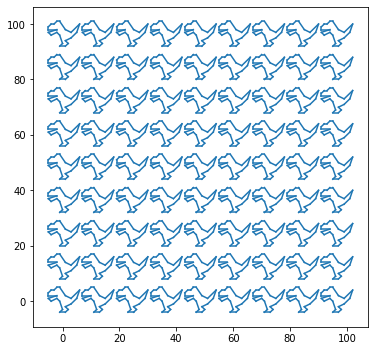

In [16]:
hundred_dinos()

In [17]:
def length(v):
    return sqrt(v[0]**2 + v[1]**2)


In [18]:
max(dino_vectors, key=length)

(6, 4)

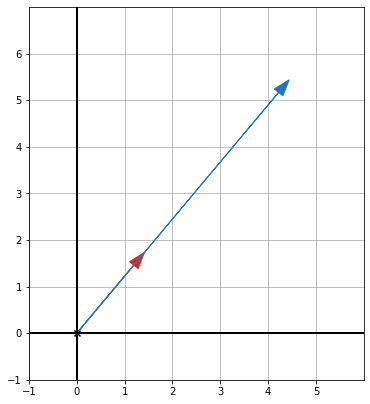

In [19]:
w = (sqrt(2), sqrt(3))
w1 = [3.14 * i for i in w]
draw(Arrow(w),
    Arrow(w1, color=blue)

)

In [20]:
def scale(scalar, vector):
    return [scalar * c for c in vector]

In [21]:
x = scale(3, (5,6))
x


[15, 18]

In [22]:
c = (3,4)
l = length(c)
s = 2


In [23]:
l

5.0

In [24]:
length(scale(s, c))


10.0

In [25]:
s*l

10.0

In [26]:
import random

u = (-1,1)
v = (1,1)

def random_r():
    return random.uniform(-3,3)
def random_s():
    return random.uniform(-1,1)

#w = r*u + s*v

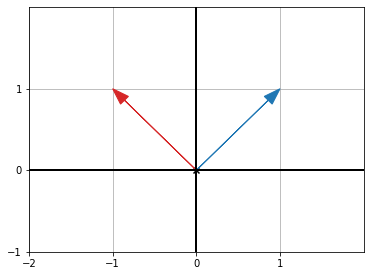

In [27]:
draw(Arrow(u),
    Arrow(v, color=blue))

-1.031968709191334

In [28]:
p = [(add(scale(random_r(), u), scale(random_s(), v))) for i in range(0, 500)];

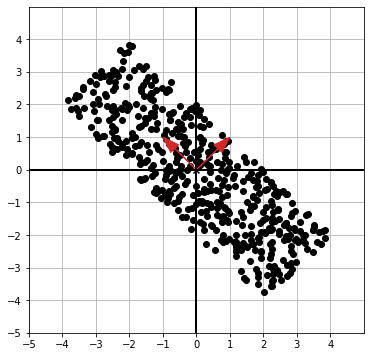

In [29]:
draw(Points(*p),
    Arrow(u),
    Arrow(v))

In [30]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

In [31]:
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

subtract(v,w)
subtract(w,v)

(2.5, -0.5)

In [32]:
def distance(v1, v2):
    return sqrt(sum([c**2 for c in subtract(v1, v2)]))

In [33]:
def perimeter(vectors):
    p = 0
    for i,v in enumerate(vectors):
        if i+1 < len(vectors):
            p += distance(v, vectors[i+1])
        elif i+1 == len(vectors):
            p += distance(v, vectors[0])
    return p

In [34]:
perimeter(dino_vectors)

44.77115093694563

In [35]:
square = [(1,0),(1,1),(0,1),(0,0)]
perimeter(square)

4.0

In [36]:
def perimeter(vectors):
    dist = [distance(vectors[i], vectors[(i+1) % len(vectors)])
        for i in range(0, len(vectors))]
    return sum(dist)

In [37]:
perimeter(square)

4.0

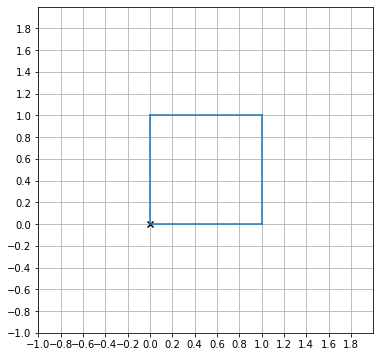

In [38]:
# sanity check with a square
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

u = (1,2), v = (n, m) where n > m, n > 0 m > 0, u - v = 13   
What is the displacement from u to v?

In [39]:
u = (1,2)

for n in range(0,15):
    for m in range(0, 16):
        if  distance(u, (n,m)) == 13 and n > m > 0:
            v = (n,m)
            print(v)

(13, 7)
(14, 2)


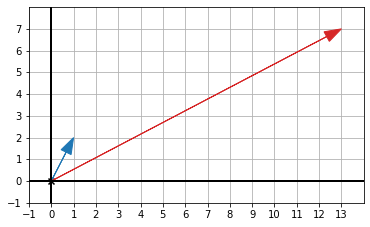

In [40]:
draw(Arrow(u, color=blue),

    Arrow((13,7), color=red))

In [41]:
distance((1,2), (13,7))

13.0

# Angles and trigonometry in the plane

## Radians and trigonometry in python

In [42]:
from math import sin,cos,pi,atan2,tan

def to_cartesian(radius, angle):
    x = radius * cos(angle)
    y = radius * sin(angle)
    return (x,y)


In [43]:
to_cartesian(5, 37*pi/180)

(3.993177550236464, 3.0090751157602416)

In [44]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

In [45]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

In [46]:
def to_radians(angle):
    return (angle*pi/180)

In [47]:
u = (8.5, to_radians(125))

to_cartesian(*u)

(-4.875399708983889, 6.962792376456433)

In [48]:
180/pi


57.29577951308232

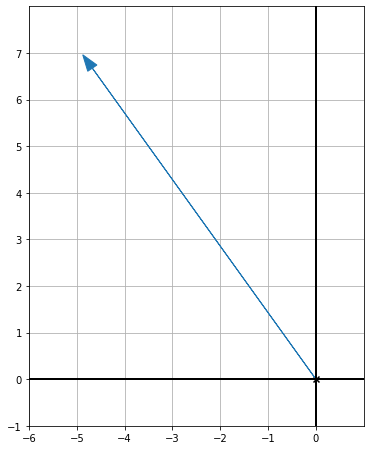

In [49]:
draw(Arrow(to_cartesian(*u), color=blue))

In [50]:
length((sqrt(3)/2, 1/2))

0.9999999999999999

In [51]:
print(f'sin(30)={sin(to_radians(30))}, cos(30)= {cos(to_radians(30))}, tan(30)={tan(to_radians(30))}')


sin(30)=0.49999999999999994, cos(30)= 0.8660254037844387, tan(30)=0.5773502691896257


In [52]:
print(f'sin(60)={sin(to_radians(60))}, cos(60)= {cos(to_radians(60))}, tan(60)={tan(to_radians(60))}')

sin(60)=0.8660254037844386, cos(60)= 0.5000000000000001, tan(60)=1.7320508075688767


In [53]:
to_radians(116.57)

2.03453030904979

In [54]:
cos(10*pi/6)
sin(10*pi/6)

-0.8660254037844386

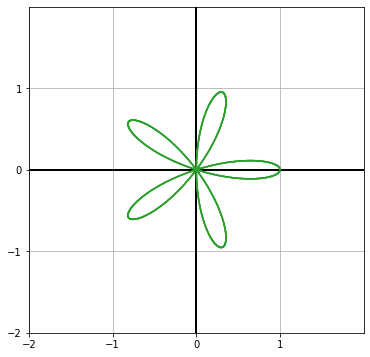

In [55]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(*p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

In [56]:
atan2(3,-2)

2.158798930342464

In [57]:
-3/2

-1.5

In [58]:
tan(2.159)

-1.4993467206361923

In [59]:
from math import atan

In [60]:
atan(-3/2)

-0.982793723247329

In [61]:
tan(1/1)

1.5574077246549023

In [62]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

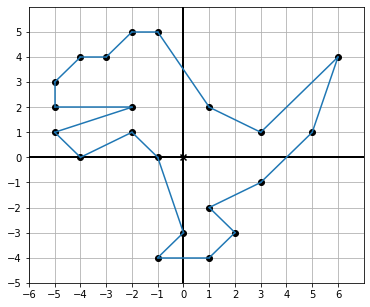

In [63]:
draw(Points(*dino_vectors), Polygon(*dino_vectors))

In [64]:
mouth_pivot = (-2,2)
mouth_top = (-5,2)
mouth_bottom = (-5,1)

v1 = subtract(mouth_top, mouth_pivot)
v2 = subtract(mouth_bottom, mouth_pivot)

v1,v2

((-3, 0), (-3, -1))

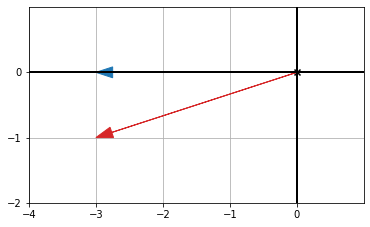

In [65]:
draw(Arrow(v1, color=blue),
    Arrow(v2))

In [66]:
_,angle1 = to_polar(v1)
_,angle2 = to_polar(v2)

angle1,angle2

(3.141592653589793, -2.819842099193151)

In [67]:
angle_mouth = angle2 + angle1
angle_mouth * (180/pi)

18.434948822922006

# Transforming collections of vectors

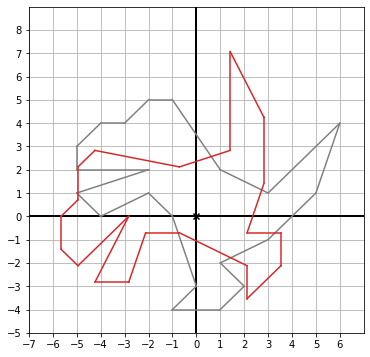

In [68]:
rotation_angle = pi/4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(*p) for p in dino_rotated_polar]
draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

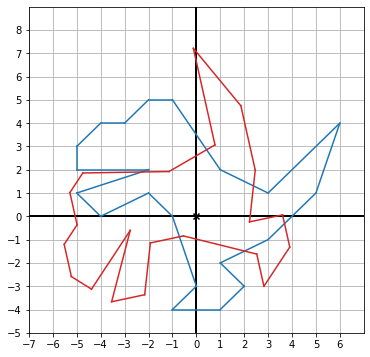

In [69]:
rotation_angle = 1
dino_polar = [to_polar(vector) for vector in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l, angle in dino_polar]
dino_rotated = [to_cartesian(*vector) for vector in dino_rotated_polar]

draw(Polygon(*dino_vectors, color=blue),
    Polygon(*dino_rotated, color=red))

In [91]:
def rotate(rotation_angle, *vectors):
    # to polar
    vectors_polar = [to_polar(v) for v in vectors]
    # rotate vectors
    vectors_rotated_polar = [(l, angle + rotation_angle) for l,angle in vectors_polar]
    # to cartesian
    vectors_rotated_cartesian = [to_cartesian(*v) for v in vectors_rotated_polar]

    return vectors_rotated_cartesian


In [93]:
dino_rotated = rotate(pi/4, *dino_vectors)

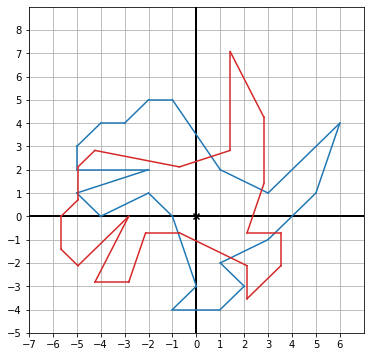

In [94]:
draw(Polygon(*dino_vectors, color=blue),
    Polygon(*dino_rotated, color=red))

In [95]:
rotate(pi/8, (2,2), (3,2))

[(1.0823922002923942, 2.613125929752753),
 (2.0062717328036808, 2.9958093621178428)]

## Combining vector transformations

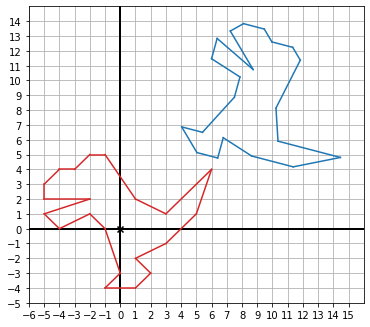

In [104]:
new_dino = translate((8,8), rotate(5 * pi/3, *dino_vectors))

draw(Polygon(*new_dino),
    Polygon(*dino_vectors, color=red))

In [168]:
def regular_polygon(n_gon):
    angle = to_radians(360/n_gon)
    polar = [(1, angle * (n+1)) for n in range(0, n_gon)]
    return [to_cartesian(*v) for v in polar]

regular_polygon(4)

[(6.123233995736766e-17, 1.0),
 (-1.0, 1.2246467991473532e-16),
 (-1.8369701987210297e-16, -1.0),
 (1.0, -2.4492935982947064e-16)]

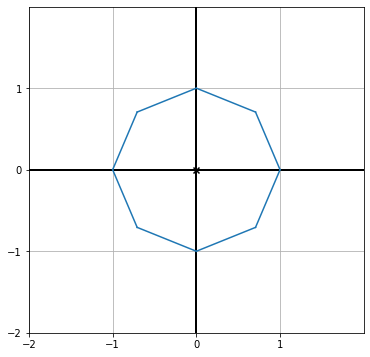

In [169]:
draw(Polygon(*regular_polygon(8)))

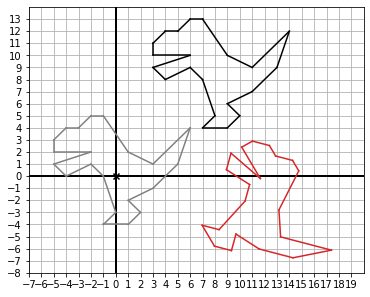

In [180]:
new_dino_t = translate((8,8), dino_vectors)
new_dino_r = rotate(5*pi/3, *new_dino_t)

draw(Polygon(*new_dino_t, color=black),
    Polygon(*dino_vectors, color=gray),
    Polygon(*new_dino_r, color=red))